***Подключене библиотек***

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

***Описание дата-сета***

Датасет heart.csv со следующими полями (наличие сердечных заболеваний)

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

*   age : Возраст
*   sex : Пол (1 = мужской; 0 = женский)
*   cp : боль в груди (0 - типичная, 1 - асимптотическая, 2 - неангинальная, 3 - нетипичная)
*   trestbps : кровяное давление в состоянии покоя
*   chol : холестерин сыворотки в мг/дл
*   fbs : уровень сахара в крови натощак > 120 мг/дл (1 = верно; 0 = неверно)
*   restecg : результаты электрокардиографии в состоянии покоя
*   thalach : максимальная частота сердечных сокращений
*   exang : стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
*   oldpeak : депрессия ST, вызванная нагрузкой по сравнению с отдыхом
*   slope : Наклон пикового сегмента ST при нагрузке
*   ca : количество крупных сосудов, окрашенных флюороскопически (0–3)
*   thal : (3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект)
*   target : АГД - Диагностика заболеваний сердца (1 = да; 0 = нет)

***1. Загрузка данных***

In [60]:
heart = pd.read_csv('heart.csv', delimiter=',')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


***2. Первичный анализ***

2.1. ***Исследование на наличие пропущенных значений***

In [61]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Пропущенных данных нет
Нечисловых данных нет

2.2. ***Проверка сбалансированности классов***

In [62]:
heart['target'].value_counts()

,count
target,
1,526
0,499


Классы условно сбалансированны

2.3. ***Описательная статистика***

In [63]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


***3. Анализ распределений и визуализация***

3.1. Pairplot

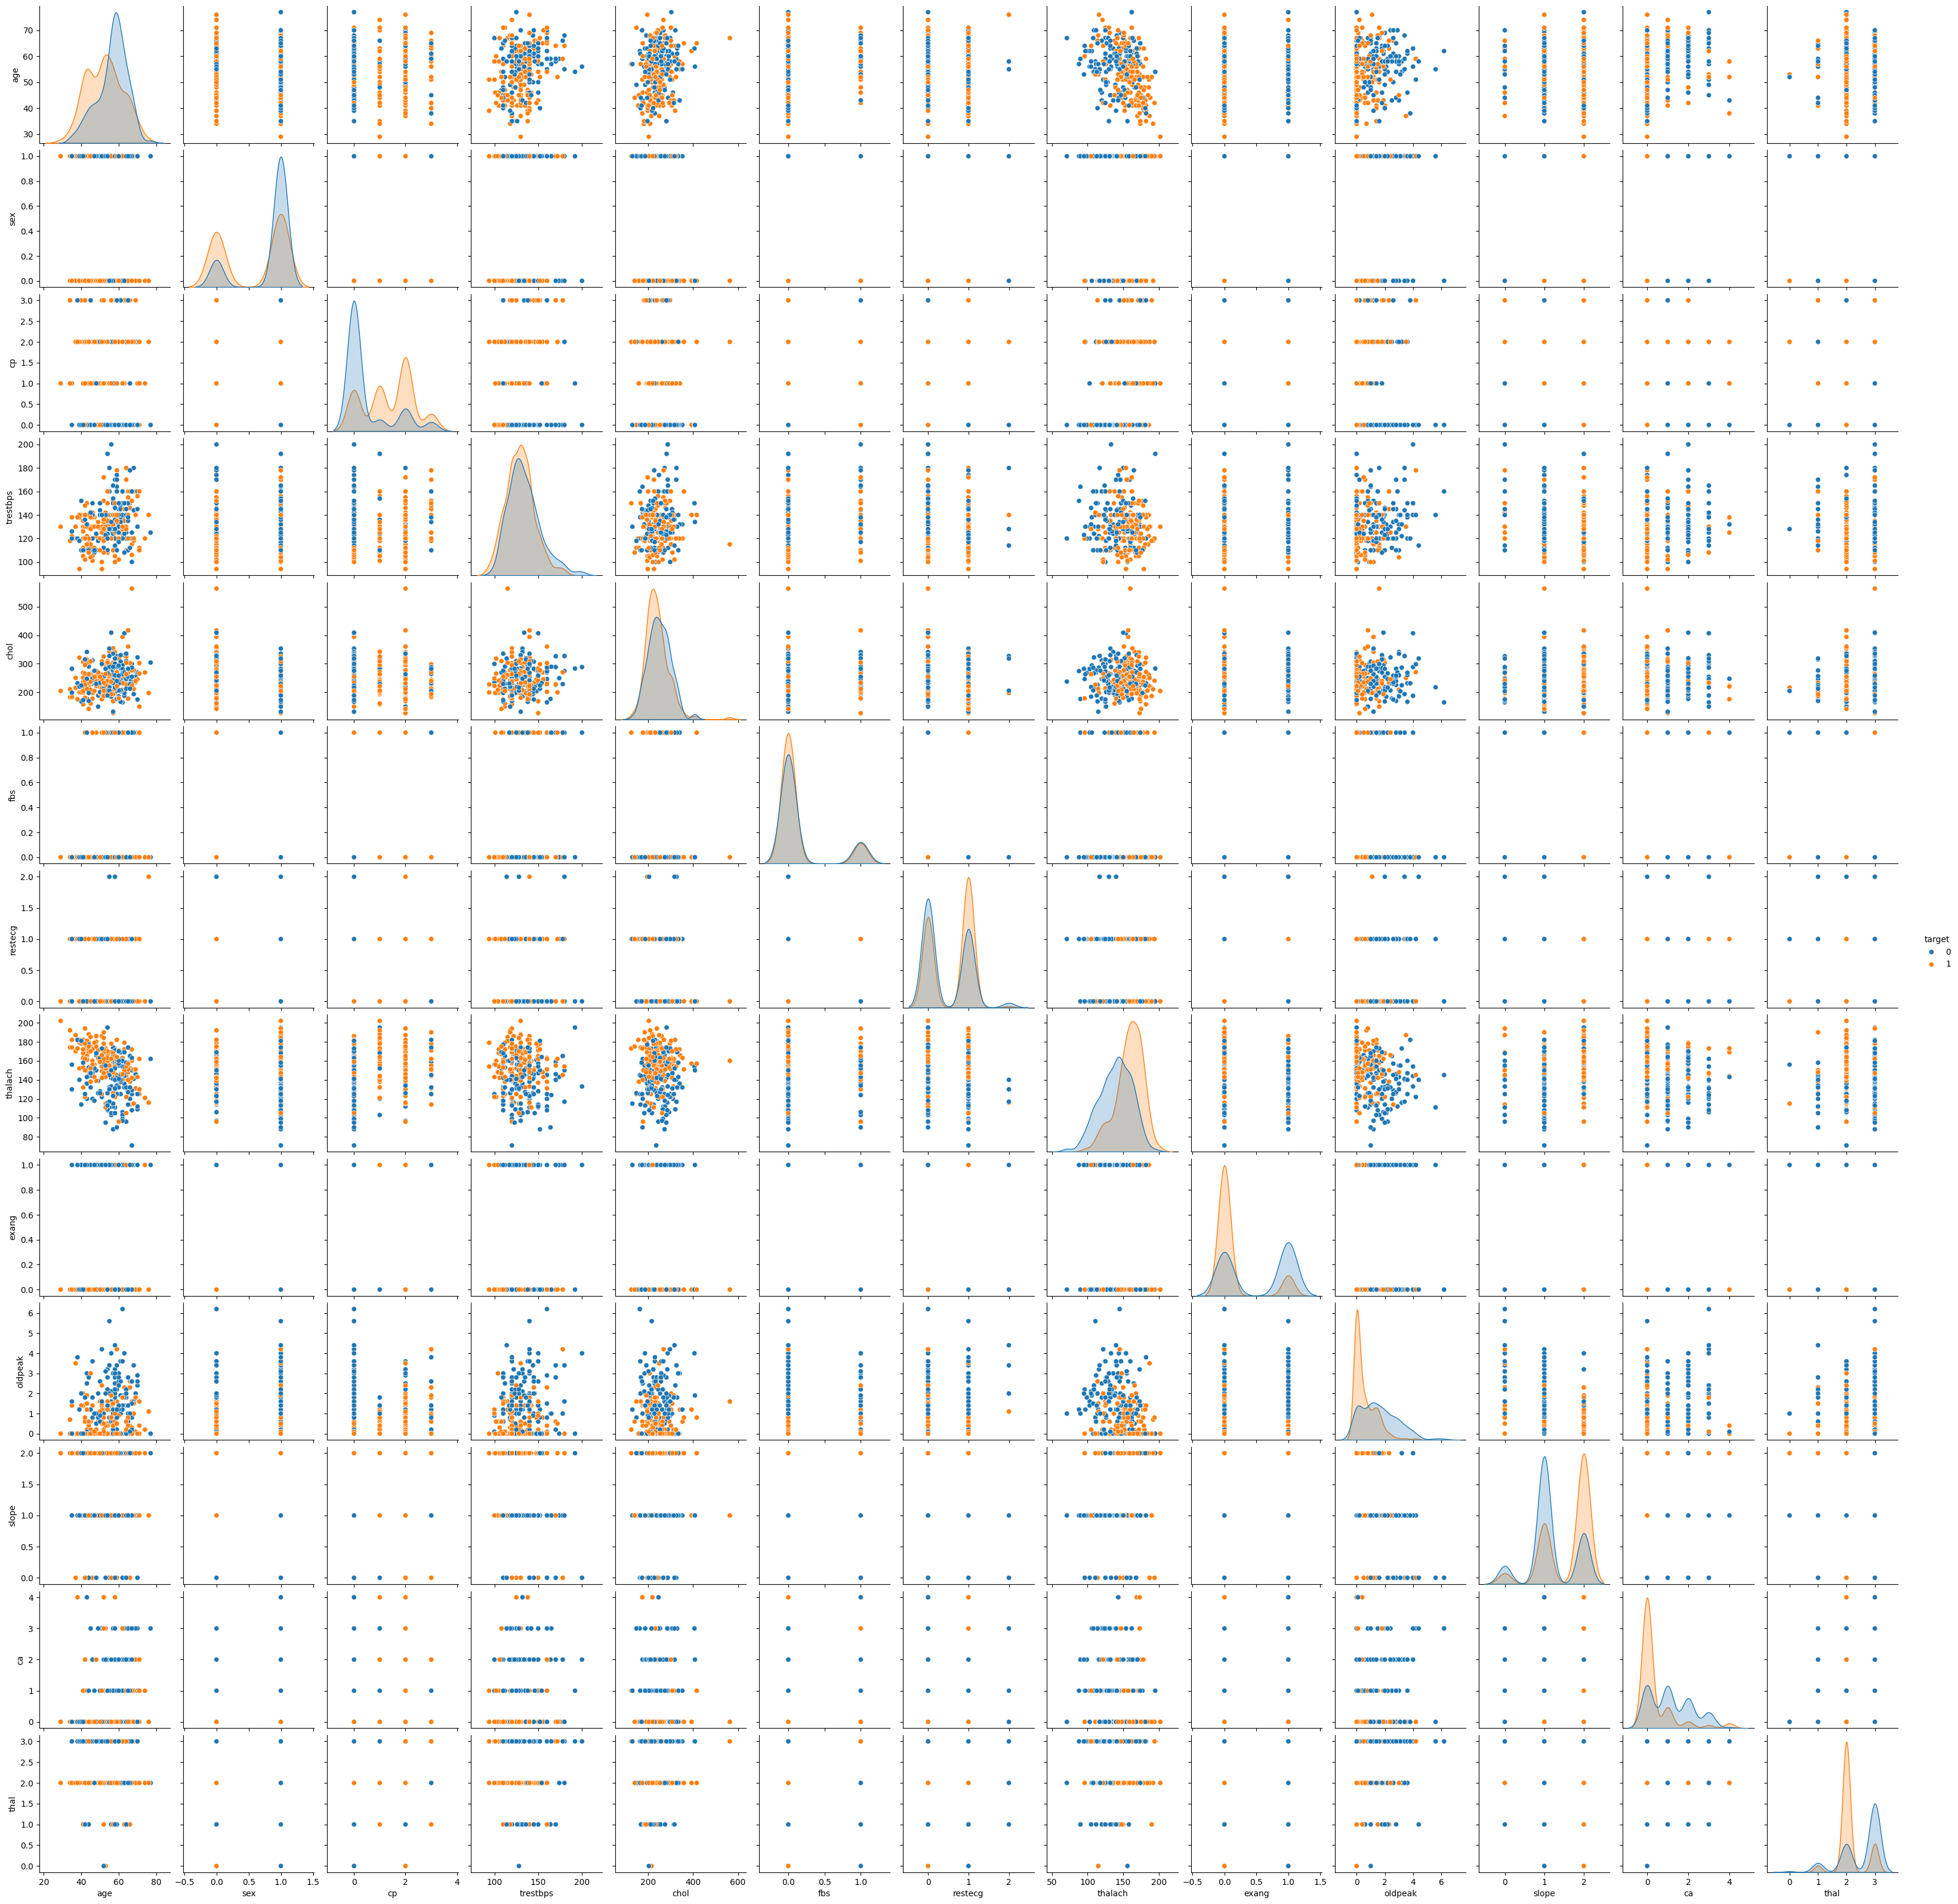

In [64]:
features = ['age', 'sex',	'cp', 'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal',	'target']
sns.pairplot(heart[features], hue='target')
plt.show()

Данные раздить сложно

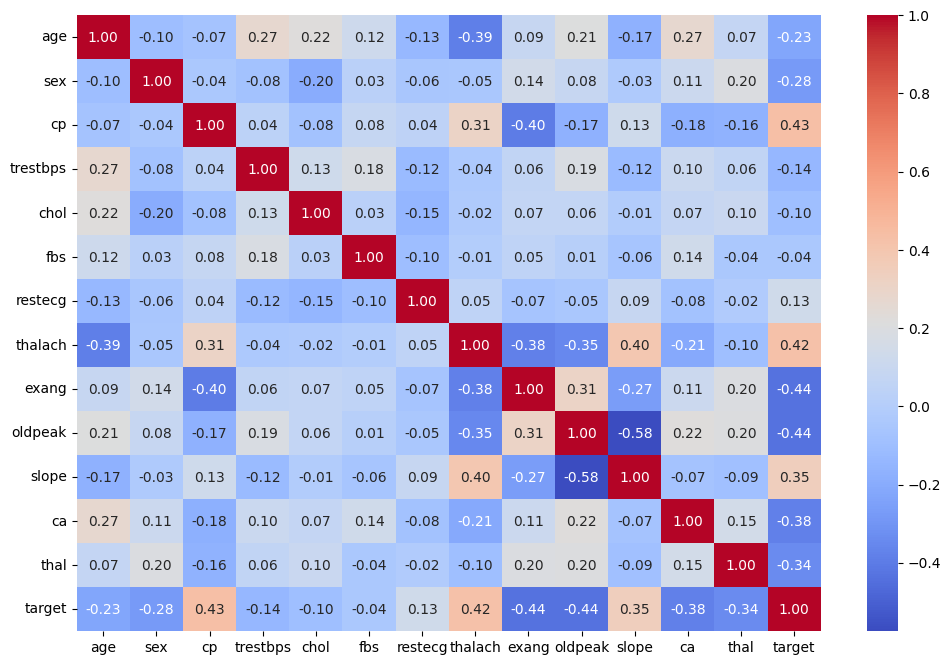

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(heart.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Прямая зависимость :
*   cp, thalach
*   **cp, targe**t
*   thalach, slope
*   **thalach, target**
*   exang, oldpeak
*   **slope, target**

Обратная зависимость :
*   age, thalach
*   cp, exang
*   thalach, exang
*   thalach, oldpeak
*   **exang, target**
*   oldpeak, slope
*   **oldpeak, target**
*   **ca, target**
*   **thal, target**


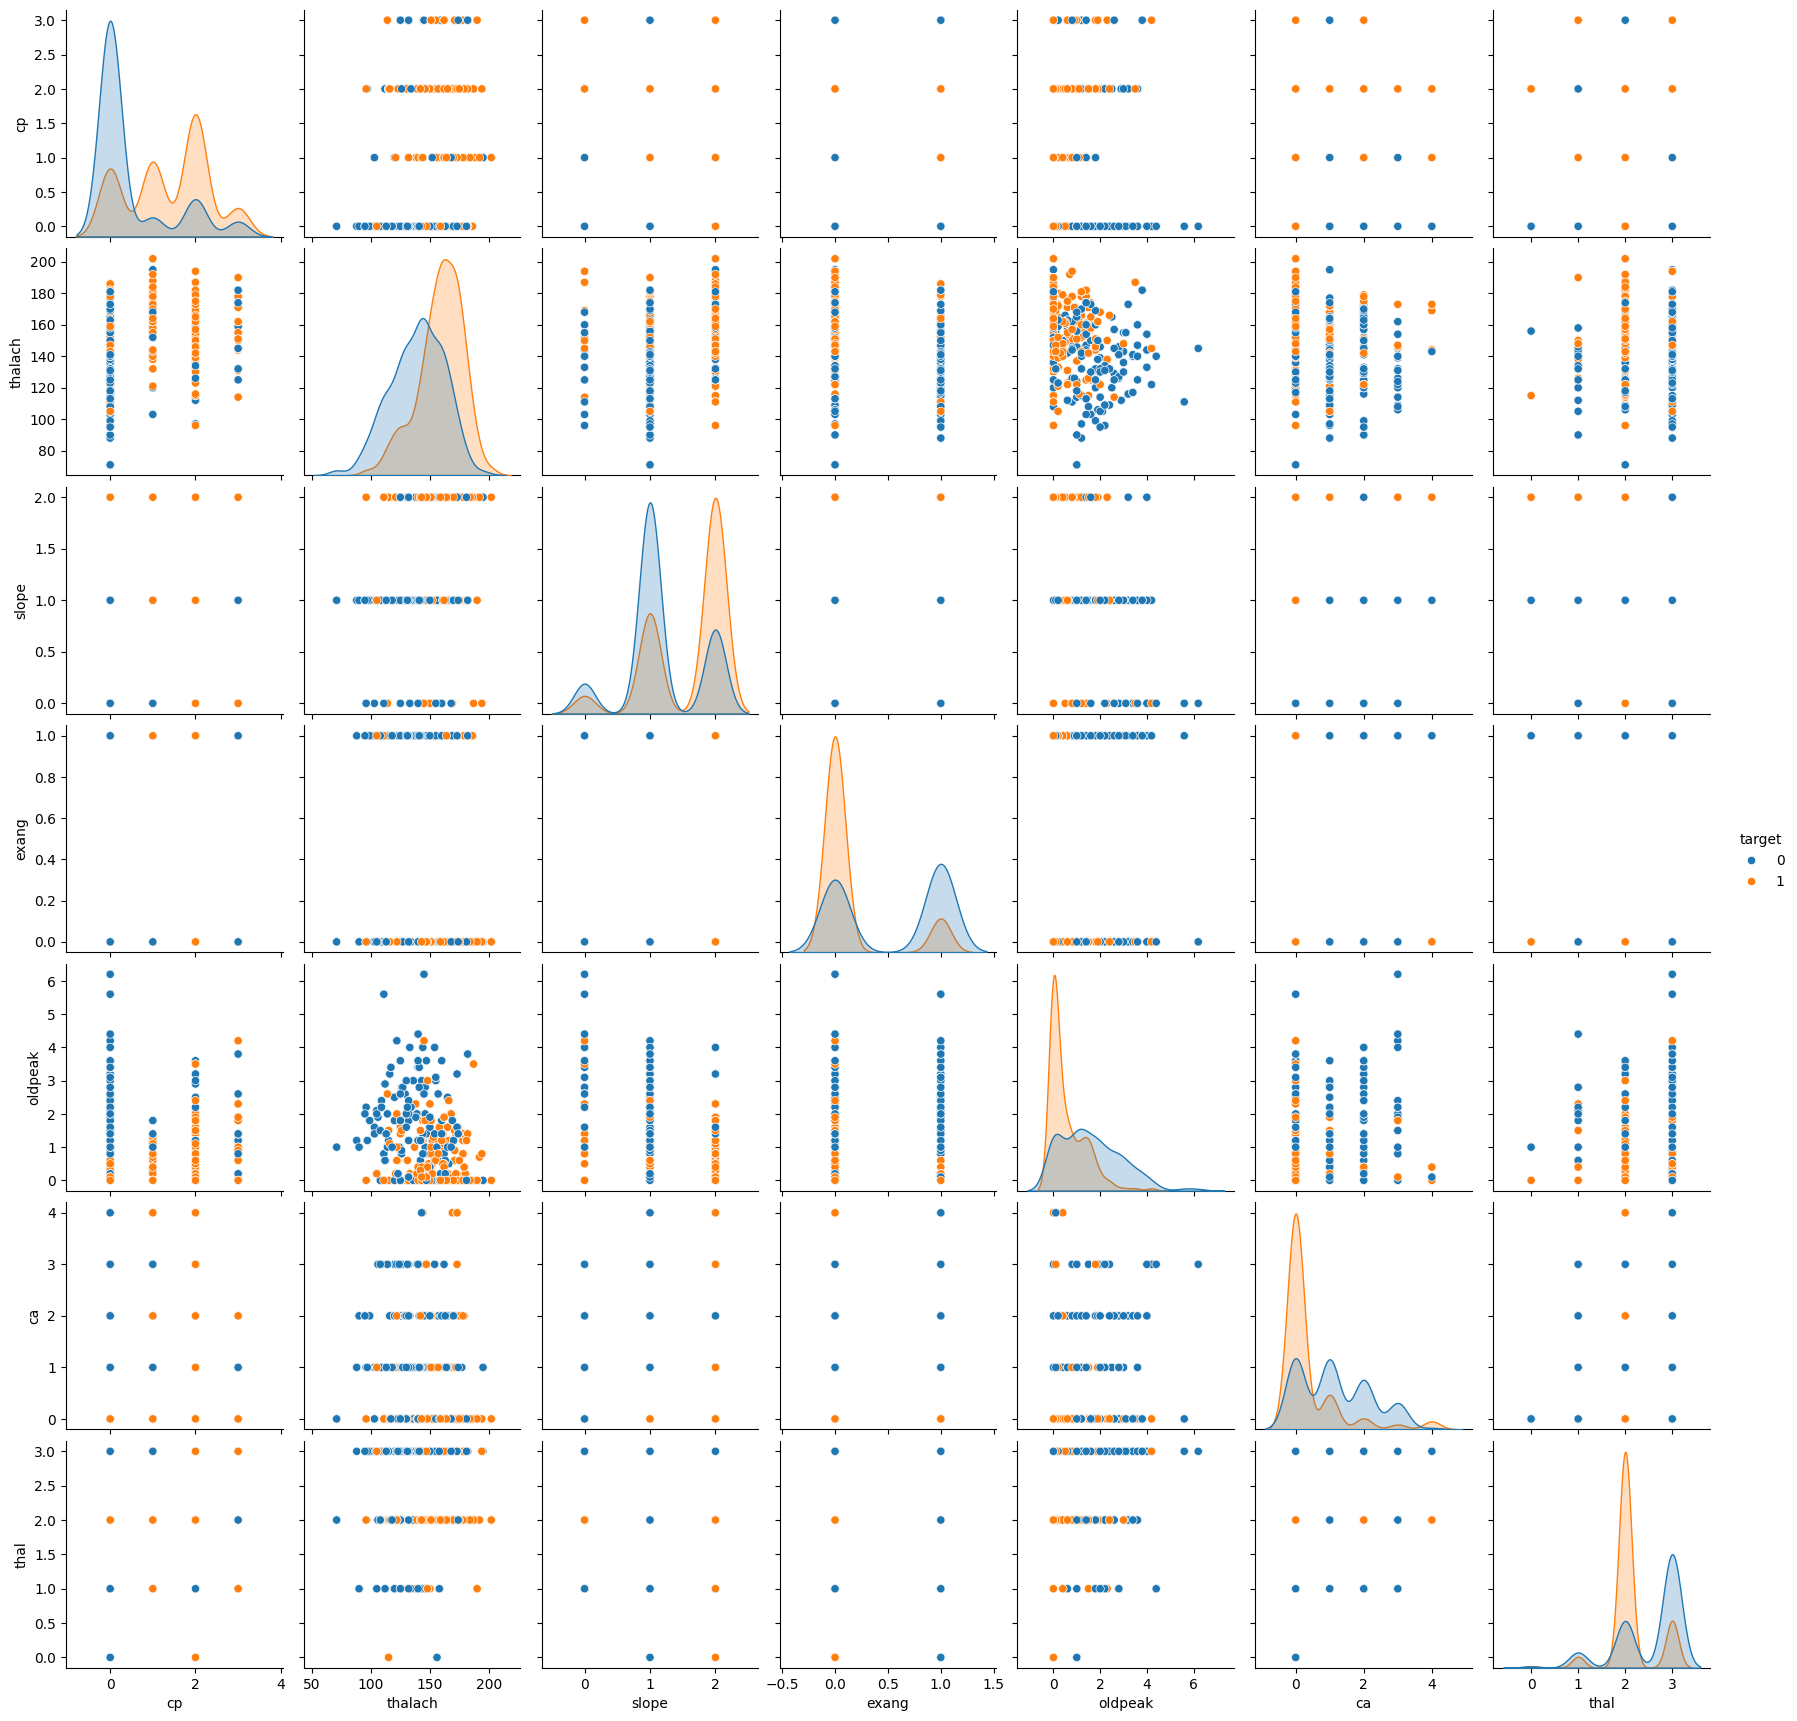

In [66]:
features_correl = ['cp', 'thalach', 'slope', 'exang', 'oldpeak', 'ca', 'thal', 'target']
sns.pairplot(heart[features_correl], hue='target')
plt.show()

(array([  4.,  39., 109., 125., 120., 205., 219., 149.,  46.,   9.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

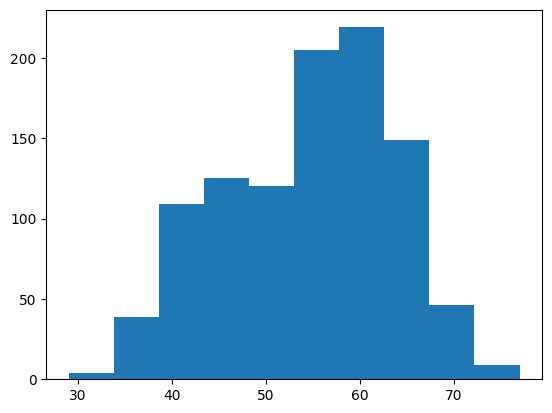

In [67]:
plt.hist(heart['age'])

Skewness: -0.2489
Kurtosis: -0.5256
Shapiro-Wilk Test: Stat=0.9844, p-value=0.0000
D'Agostino-Pearson Test: Stat=32.3322, p-value=0.0000
Kolmogorov-Smirnov Test: Stat=0.0796, p-value=0.0000



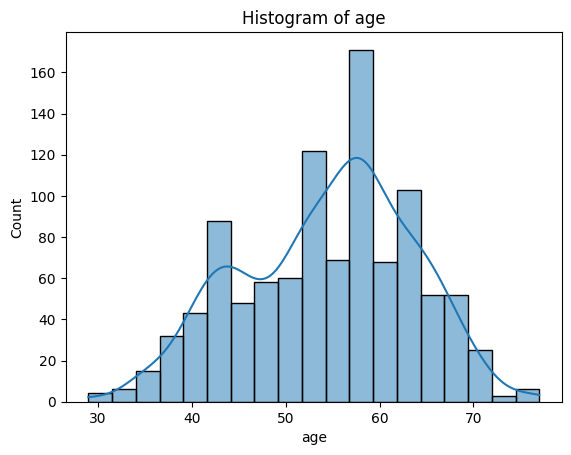

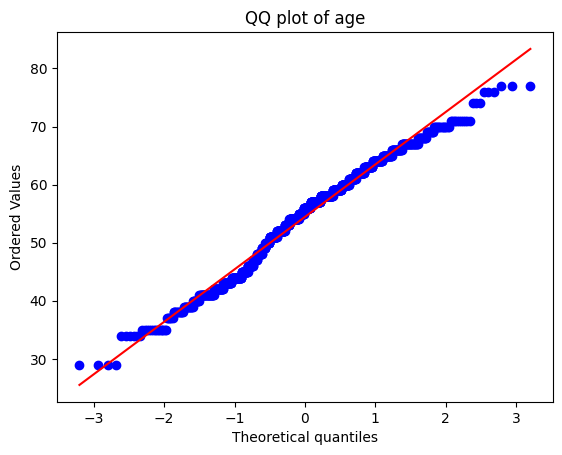

In [68]:
column = 'age'
# Асимметрия
skewness = heart[column].skew()
print(f"Skewness: {skewness:.4f}")

# Эксцесс
kurtosis = heart[column].kurtosis()
print(f"Kurtosis: {kurtosis:.4f}")

# Тест Шапиро-Уилка
stat, p = stats.shapiro(heart[column])
print(f"Shapiro-Wilk Test: Stat={stat:.4f}, p-value={p:.4f}")

# Тест Д’Агостино и Пирсона
stat, p = stats.normaltest(heart[column])
print(f"D'Agostino-Pearson Test: Stat={stat:.4f}, p-value={p:.4f}")

# Тест Колмогорова-Смирнова
stat, p = stats.kstest(heart[column], 'norm', args=(heart[column].mean(), heart[column].std()))
print(f"Kolmogorov-Smirnov Test: Stat={stat:.4f}, p-value={p:.4f}")

print()

# Визуализация распределения и QQ plot
sns.histplot(heart[column], kde=True)
plt.title(f'Histogram of {column}')
plt.show()

stats.probplot(heart[column], dist="norm", plot=plt)
plt.title(f'QQ plot of {column}')
plt.show()

Скewness (-0.2489): Небольшое отрицательное смещение, указывающее на то, что распределение немного скошено влево.

Kurtosis (-0.5256): Негативная куртозис говорит о том, что распределение имеет более плоский вид, чем нормальное.

Shapiro-Wilk Test: Статистика 0.9844 и p-value 0.0000 указывают на отклонение от нормальности; данные не нормально распределены.

D'Agostino-Pearson Test: Высокое значение статистики (32.3322) и p-value 0.0000 подтверждают, что распределение отличается от нормального.

Kolmogorov-Smirnov Test: Статистика 0.0796 и p-value 0.0000 также указывают на значительное отклонение от нормального распределения.

Общий вывод:
Данные не имеют нормального распределения, с небольшим скошением влево и более плоским профилем по сравнению с нормальным распределением.

(array([ 33., 140., 232., 251., 192.,  89.,  43.,  28.,  10.,   7.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <BarContainer object of 10 artists>)

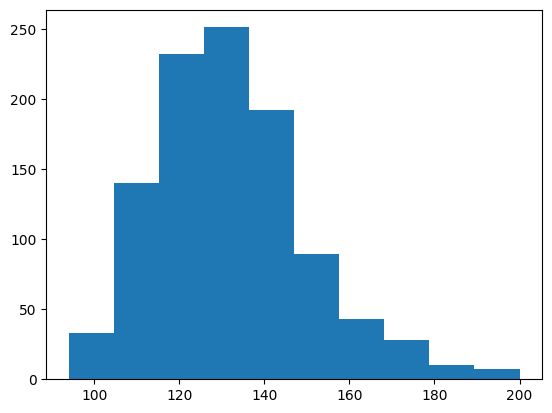

In [69]:
plt.hist(heart['trestbps'])

Skewness: 0.7398
Kurtosis: 0.9912
Shapiro-Wilk Test: Stat=0.9633, p-value=0.0000
D'Agostino-Pearson Test: Stat=97.4631, p-value=0.0000
Kolmogorov-Smirnov Test: Stat=0.1043, p-value=0.0000



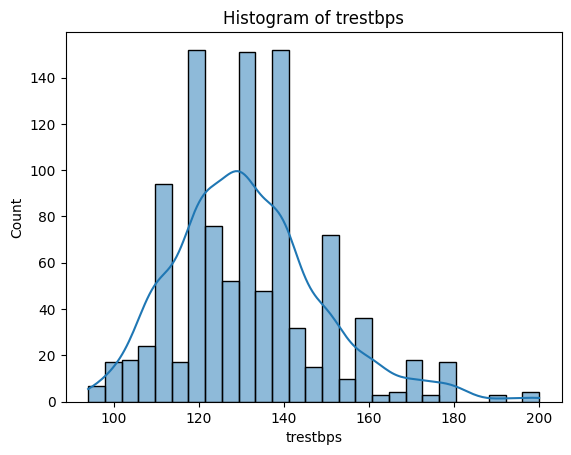

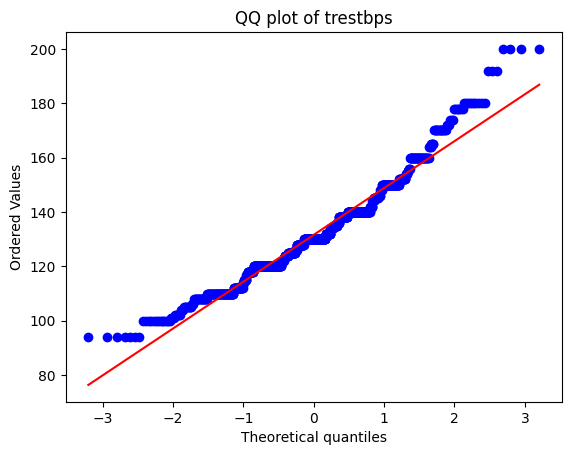

In [70]:
column = 'trestbps'
# Асимметрия
skewness = heart[column].skew()
print(f"Skewness: {skewness:.4f}")

# Эксцесс
kurtosis = heart[column].kurtosis()
print(f"Kurtosis: {kurtosis:.4f}")

# Тест Шапиро-Уилка
stat, p = stats.shapiro(heart[column])
print(f"Shapiro-Wilk Test: Stat={stat:.4f}, p-value={p:.4f}")

# Тест Д’Агостино и Пирсона
stat, p = stats.normaltest(heart[column])
print(f"D'Agostino-Pearson Test: Stat={stat:.4f}, p-value={p:.4f}")

# Тест Колмогорова-Смирнова
stat, p = stats.kstest(heart[column], 'norm', args=(heart[column].mean(), heart[column].std()))
print(f"Kolmogorov-Smirnov Test: Stat={stat:.4f}, p-value={p:.4f}")

print()

# Визуализация распределения и QQ plot
sns.histplot(heart[column], kde=True)
plt.title(f'Histogram of {column}')
plt.show()

stats.probplot(heart[column], dist="norm", plot=plt)
plt.title(f'QQ plot of {column}')
plt.show()

Скewness (0.7398): Положительное смещение указывает на то, что распределение скошено вправо, что означает наличие длинного правого хвоста.

Kurtosis (0.9912): Значение куртозиса близко к нулю, что говорит о том, что распределение имеет близкий к нормальному профиль, хотя и может быть слегка "пухлым".

Shapiro-Wilk Test: Статистика 0.9633 и p-value 0.0000 указывают на отклонение от нормальности; данные не нормально распределены.

D'Agostino-Pearson Test: Высокая статистика (97.4631) и p-value 0.0000 подтверждают, что распределение существенно отличается от нормального.

Kolmogorov-Smirnov Test: Статистика 0.1043 и p-value 0.0000 также свидетельствуют о значительном отклонении от нормального распределения.

Общий вывод:
Данные не подчиняются нормальному распределению, имеют положительное скошение и близкий к нормальному куртозис, что указывает на наличие длинного правого хвоста.

(array([ 42., 247., 359., 231., 120.,  10.,  13.,   0.,   0.,   3.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <BarContainer object of 10 artists>)

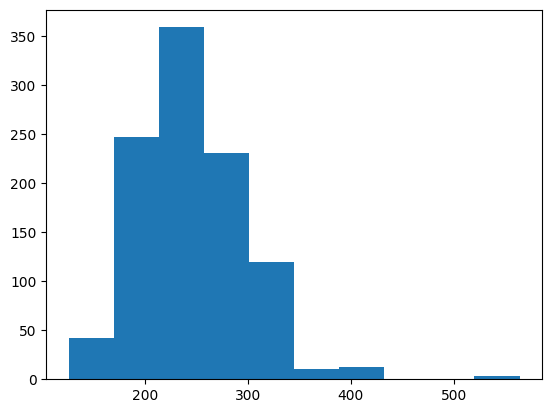

In [71]:
plt.hist(heart['chol'])

Skewness: 1.0741
Kurtosis: 3.9968
Shapiro-Wilk Test: Stat=0.9502, p-value=0.0000
D'Agostino-Pearson Test: Stat=236.9045, p-value=0.0000
Kolmogorov-Smirnov Test: Stat=0.0564, p-value=0.0029



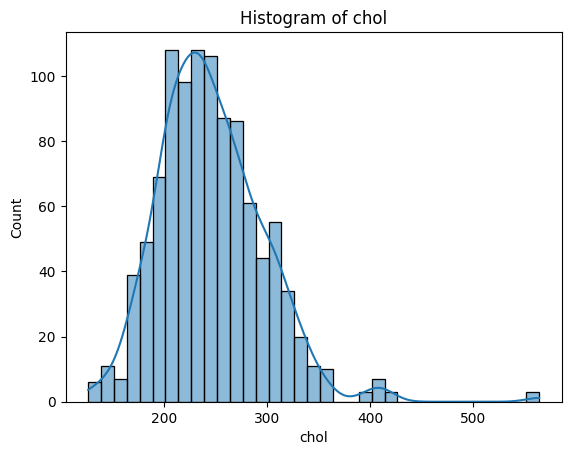

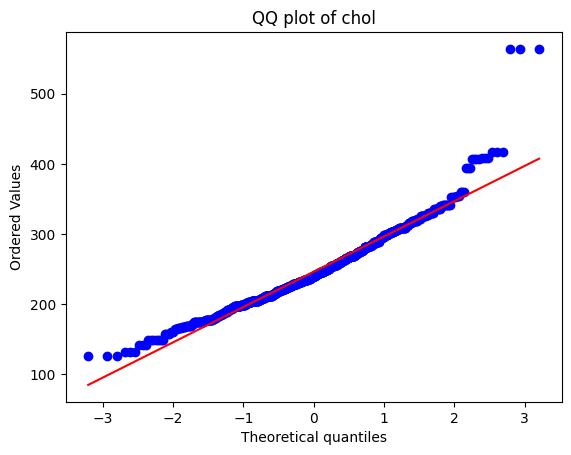

In [72]:
column = 'chol'
# Асимметрия
skewness = heart[column].skew()
print(f"Skewness: {skewness:.4f}")

# Эксцесс
kurtosis = heart[column].kurtosis()
print(f"Kurtosis: {kurtosis:.4f}")

# Тест Шапиро-Уилка
stat, p = stats.shapiro(heart[column])
print(f"Shapiro-Wilk Test: Stat={stat:.4f}, p-value={p:.4f}")

# Тест Д’Агостино и Пирсона
stat, p = stats.normaltest(heart[column])
print(f"D'Agostino-Pearson Test: Stat={stat:.4f}, p-value={p:.4f}")

# Тест Колмогорова-Смирнова
stat, p = stats.kstest(heart[column], 'norm', args=(heart[column].mean(), heart[column].std()))
print(f"Kolmogorov-Smirnov Test: Stat={stat:.4f}, p-value={p:.4f}")

print()

# Визуализация распределения и QQ plot
sns.histplot(heart[column], kde=True)
plt.title(f'Histogram of {column}')
plt.show()

stats.probplot(heart[column], dist="norm", plot=plt)
plt.title(f'QQ plot of {column}')
plt.show()

Скewness (1.0741): Положительное смещение указывает на выраженное скашивание вправо, что свидетельствует о наличии длинного правого хвоста.

Kurtosis (3.9968): Значение куртозиса близко к 4, что указывает на распределение с высокой концентрацией данных около среднего и более выраженными хвостами, чем у нормального распределения.

Shapiro-Wilk Test: Статистика 0.9502 и p-value 0.0000 указывают на значительное отклонение от нормальности; данные не нормально распределены.

D'Agostino-Pearson Test: Высокая статистика (236.9045) и p-value 0.0000 подтверждают, что распределение существенно отличается от нормального.

Kolmogorov-Smirnov Test: Статистика 0.0564 и p-value 0.0029 также указывают на отклонение от нормального распределения.

Общий вывод:
Данные имеют ненормальное распределение с положительным скошением и высокой куртозисом, что указывает на выраженные хвосты и концентрацию значений вокруг среднего.

(array([  4.,  21.,  39.,  87., 127., 180., 255., 212.,  83.,  17.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <BarContainer object of 10 artists>)

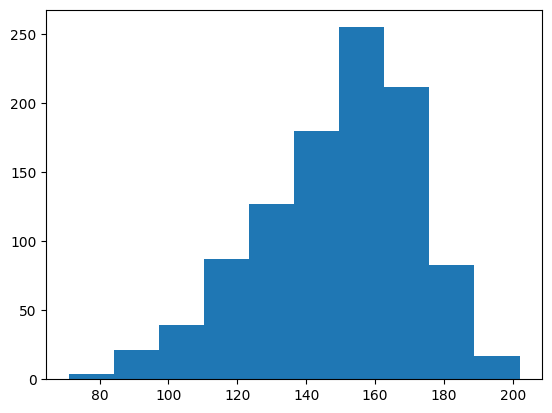

In [73]:
plt.hist(heart['thalach'])

Skewness: -0.5138
Kurtosis: -0.0888
Shapiro-Wilk Test: Stat=0.9774, p-value=0.0000
D'Agostino-Pearson Test: Stat=41.0029, p-value=0.0000
Kolmogorov-Smirnov Test: Stat=0.0685, p-value=0.0001



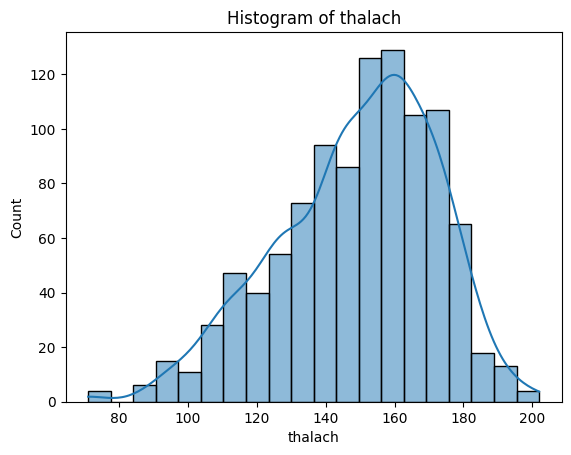

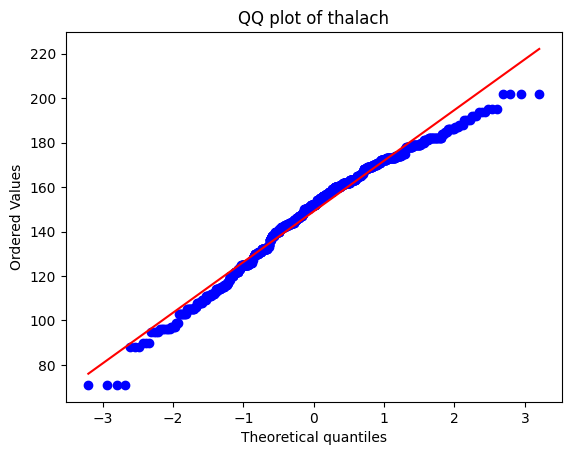

In [74]:
column = 'thalach'
# Асимметрия
skewness = heart[column].skew()
print(f"Skewness: {skewness:.4f}")

# Эксцесс
kurtosis = heart[column].kurtosis()
print(f"Kurtosis: {kurtosis:.4f}")

# Тест Шапиро-Уилка
stat, p = stats.shapiro(heart[column])
print(f"Shapiro-Wilk Test: Stat={stat:.4f}, p-value={p:.4f}")

# Тест Д’Агостино и Пирсона
stat, p = stats.normaltest(heart[column])
print(f"D'Agostino-Pearson Test: Stat={stat:.4f}, p-value={p:.4f}")

# Тест Колмогорова-Смирнова
stat, p = stats.kstest(heart[column], 'norm', args=(heart[column].mean(), heart[column].std()))
print(f"Kolmogorov-Smirnov Test: Stat={stat:.4f}, p-value={p:.4f}")

print()

# Визуализация распределения и QQ plot
sns.histplot(heart[column], kde=True)
plt.title(f'Histogram of {column}')
plt.show()

stats.probplot(heart[column], dist="norm", plot=plt)
plt.title(f'QQ plot of {column}')
plt.show()

Скewness (-0.5138): Негативное смещение указывает на то, что распределение скошено влево, что означает наличие длинного левого хвоста.

Kurtosis (-0.0888): Негативное значение куртозиса близко к нулю, что говорит о том, что распределение немного более плоское, чем нормальное.

Shapiro-Wilk Test: Статистика 0.9774 и p-value 0.0000 указывают на значительное отклонение от нормальности; данные не нормально распределены.

D'Agostino-Pearson Test: Высокая статистика (41.0029) и p-value 0.0000 подтверждают, что распределение существенно отличается от нормального.

Kolmogorov-Smirnov Test: Статистика 0.0685 и p-value 0.0001 также свидетельствуют о значительном отклонении от нормального распределения.

Общий вывод:
Данные имеют ненормальное распределение с отрицательным скошением и немного плоским профилем, что указывает на наличие длинного левого хвоста и отклонение от нормальности.

<Axes: xlabel='sex', ylabel='count'>

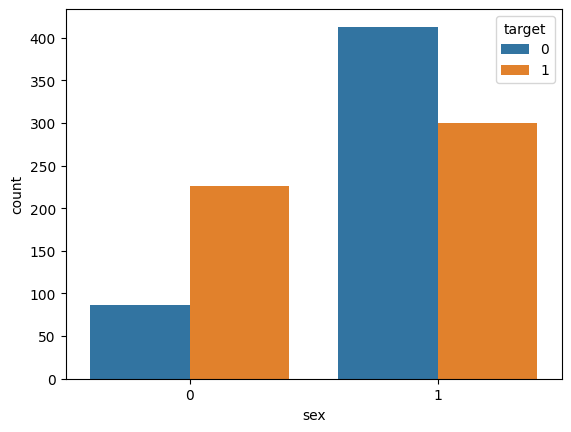

In [75]:
sns.countplot(data=heart, x='sex', hue='target')

Среди женщин здоровых больше, чем больных, а у мужчин больных больше чем здоровых (мужчины болеют чаще)

<Axes: xlabel='age', ylabel='count'>

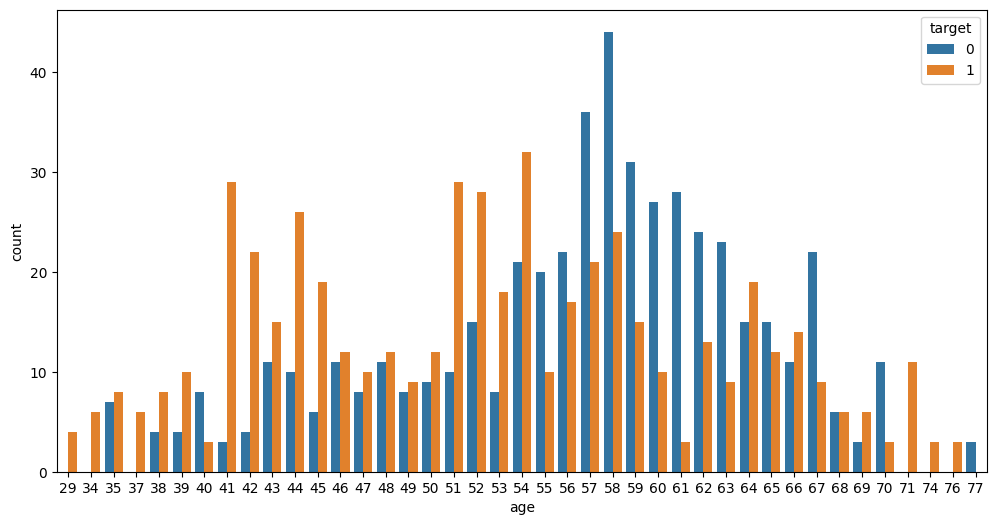

In [76]:
plt.figure(figsize=(12, 6))
sns.countplot(data=heart, x='age', hue='target')

Наибольшее число пациентов в выборке имеют болезни сердца с 41 до 45 лет и с 51 до 54 лет

<Axes: xlabel='cp', ylabel='count'>

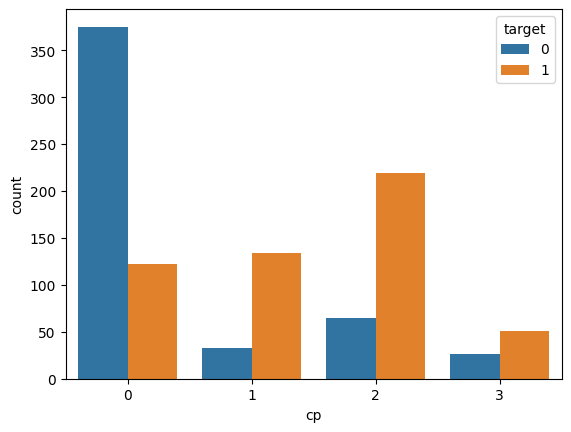

In [77]:
sns.countplot(data=heart, x='cp', hue='target')

При наличии типичной боли в груди, менее вероятно наличие сердечного заболевания.

При наличии других видов боли заболевания сердца наблюдаются чаще.

<Axes: xlabel='fbs', ylabel='count'>

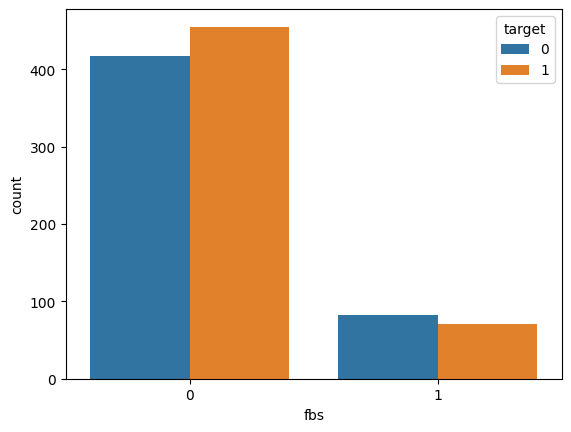

In [78]:
sns.countplot(data=heart, x='fbs', hue='target')

При уровне сахара в крови натощак > 120 мг/дл не наблюдается различий в количестве людей с заболеванием сердца.

<Axes: xlabel='exang', ylabel='count'>

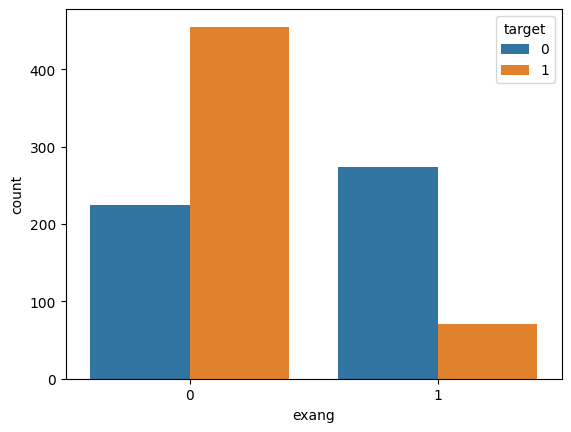

In [79]:
sns.countplot(data=heart, x='exang', hue='target')

При отсутсвии стенокардии при физической нагрузки заболевания сердца выявляются значительно чаще.

***По заданию (2 визуализации на каждый признак)***

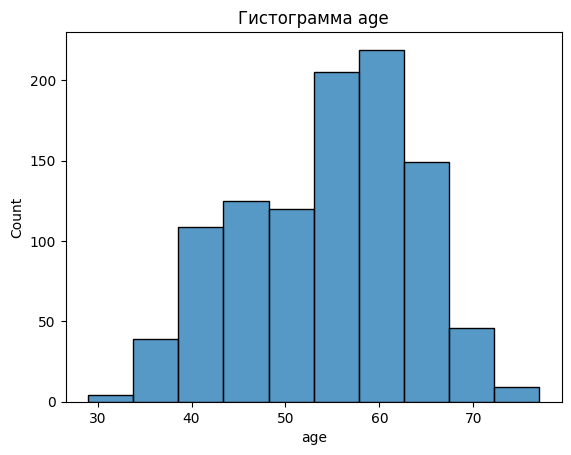

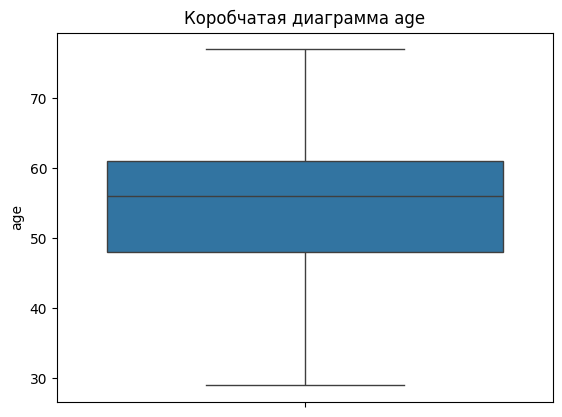

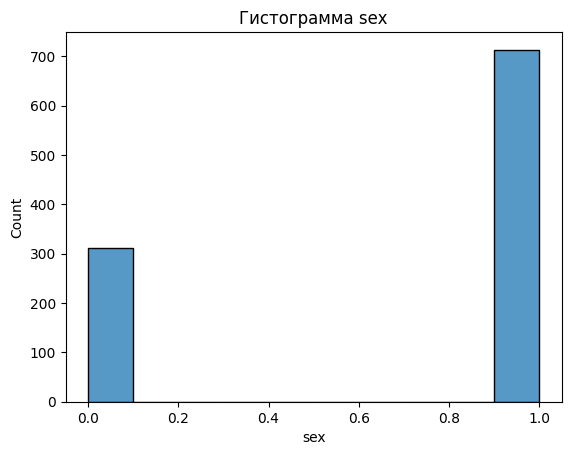

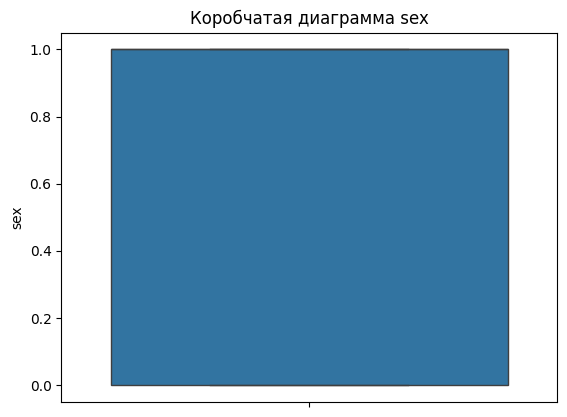

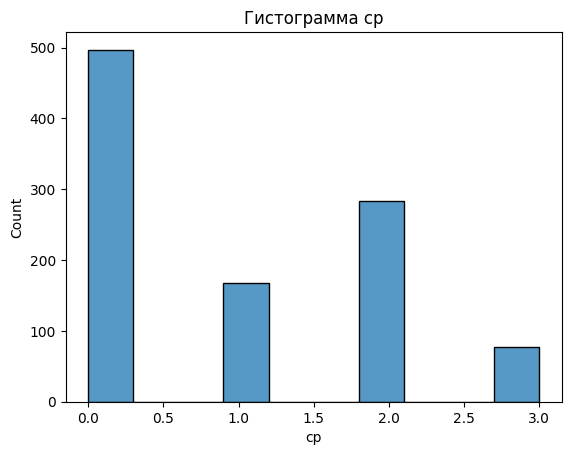

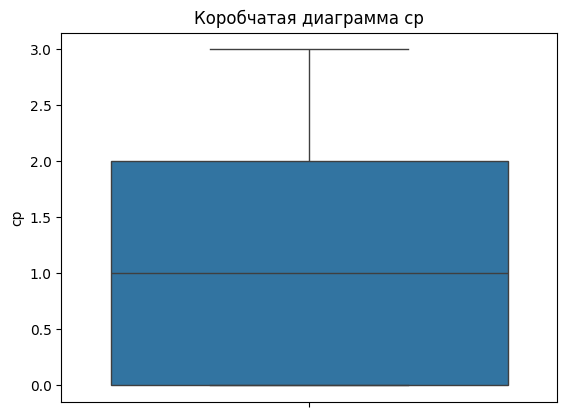

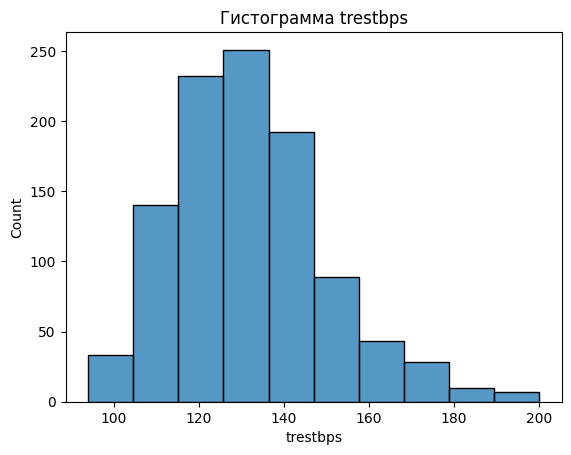

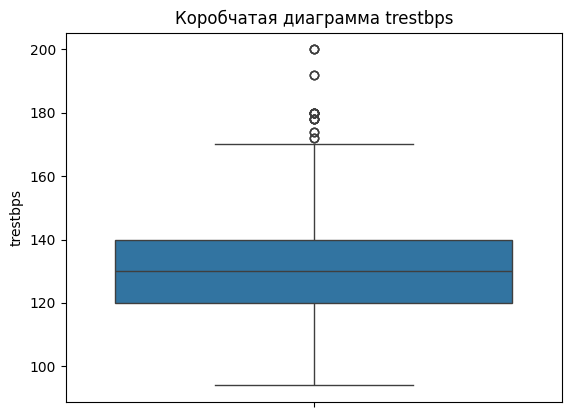

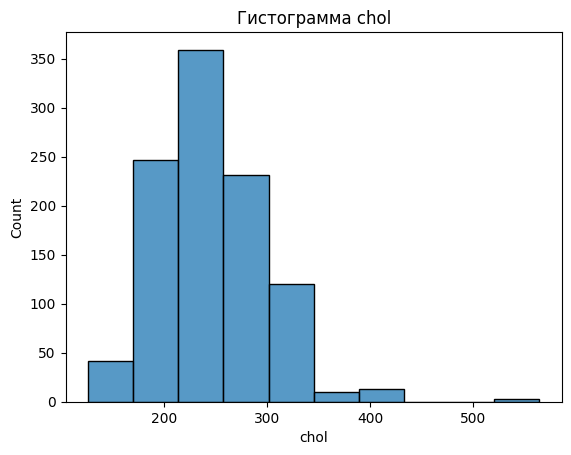

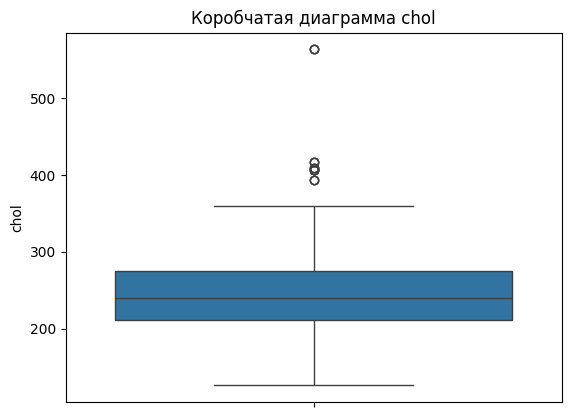

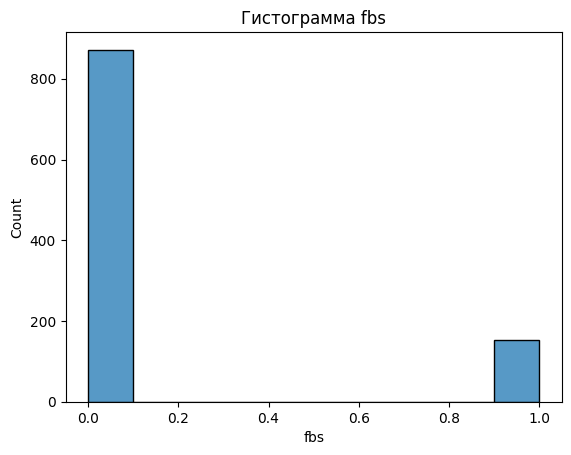

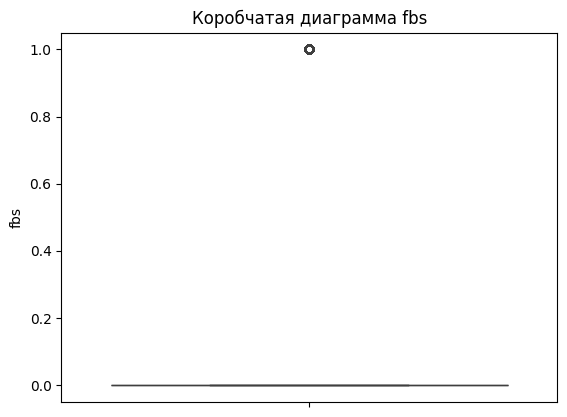

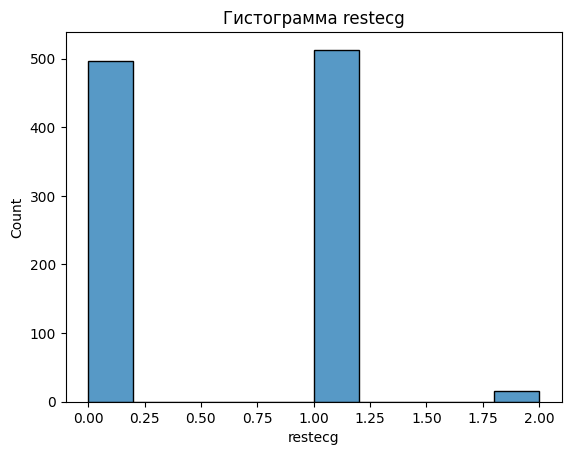

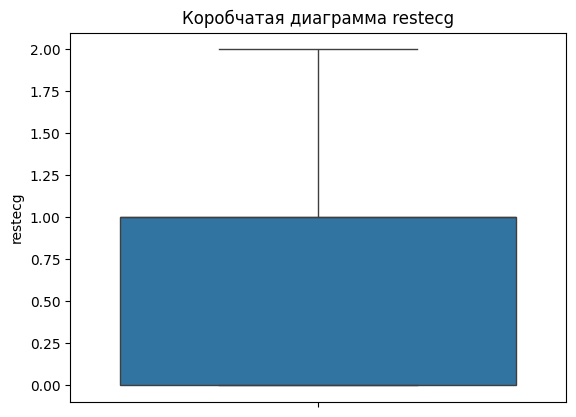

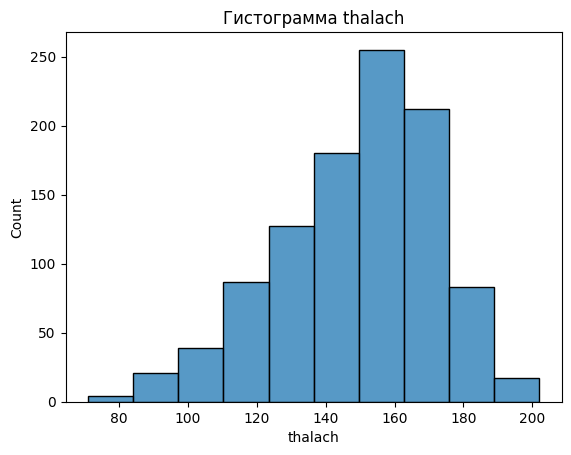

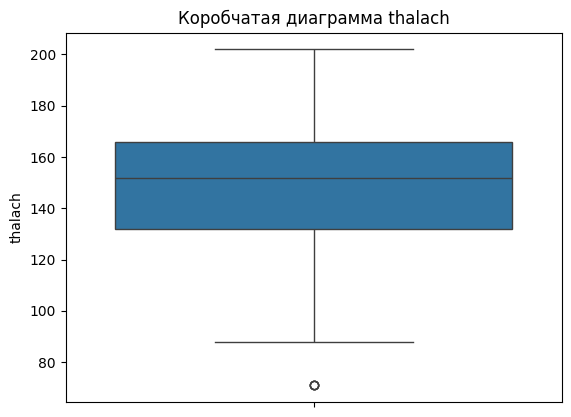

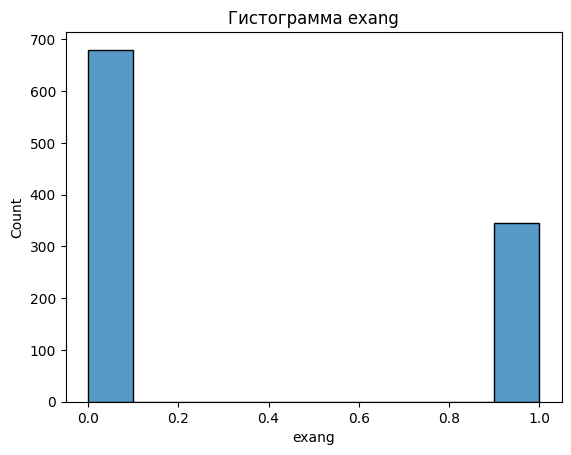

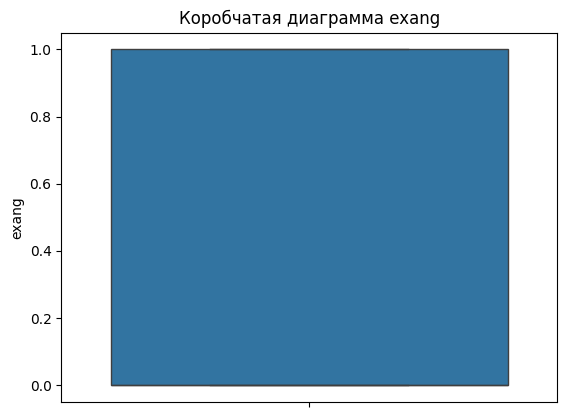

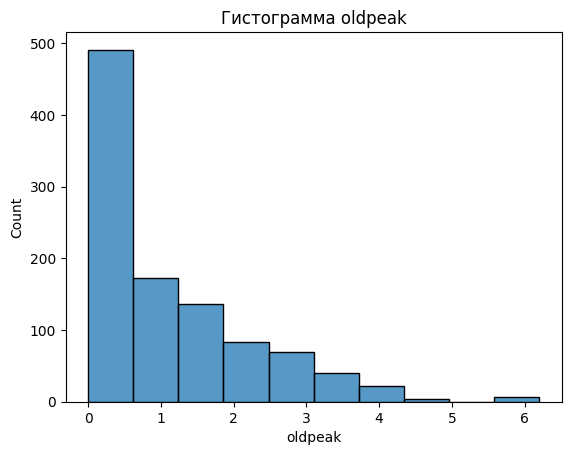

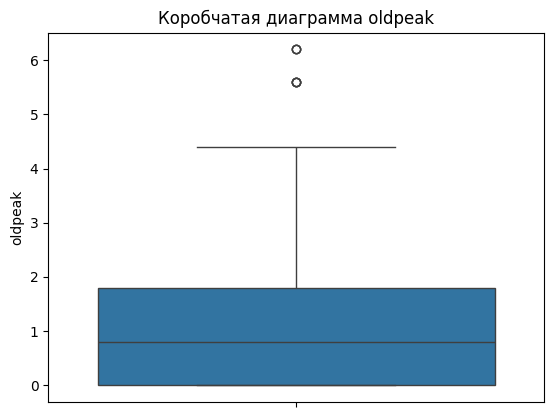

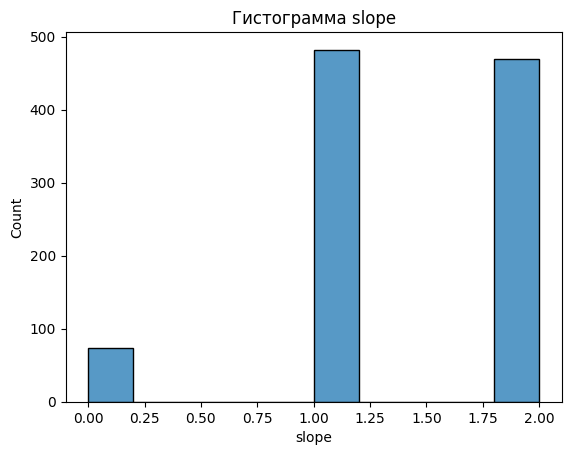

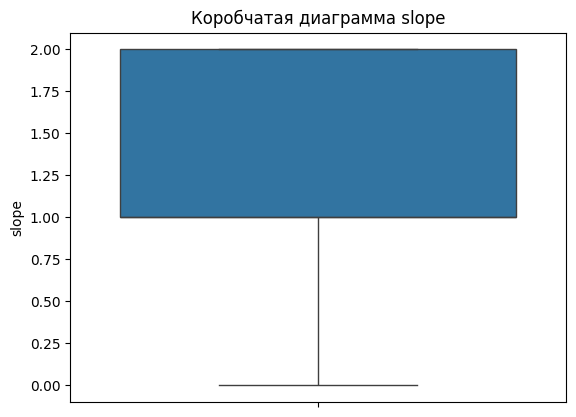

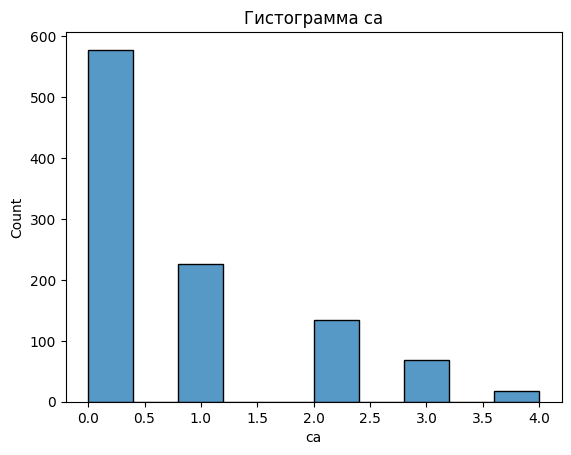

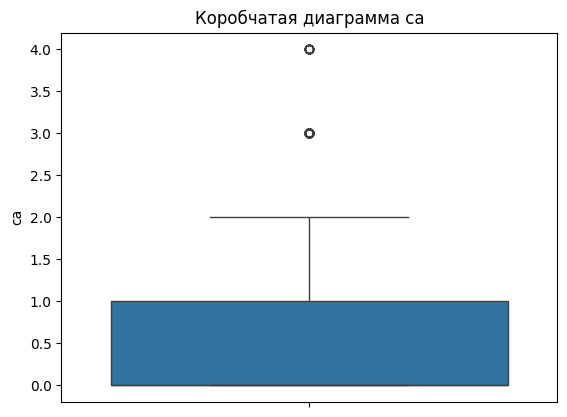

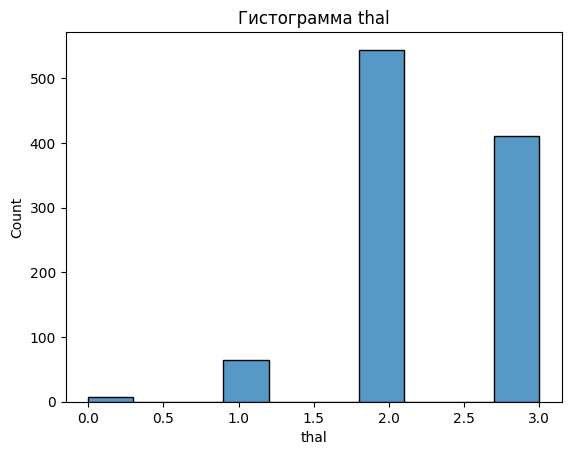

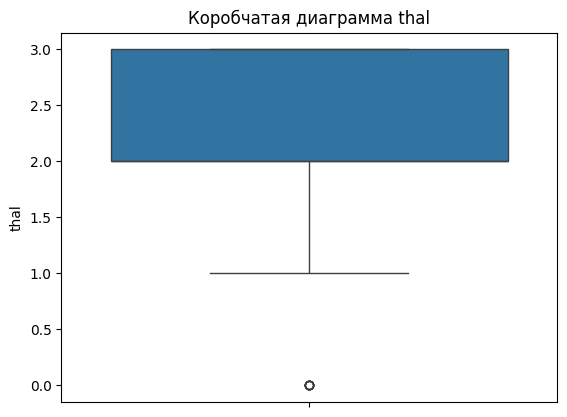

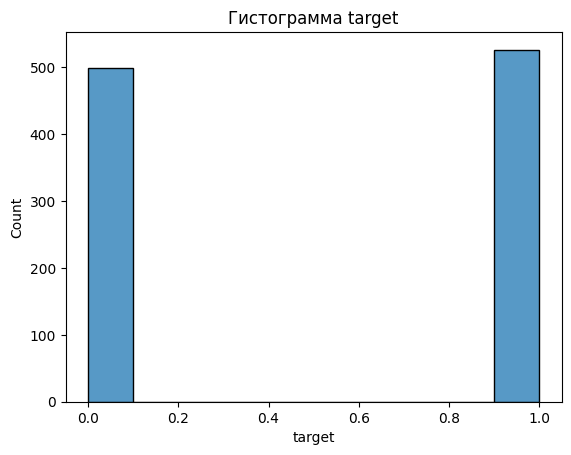

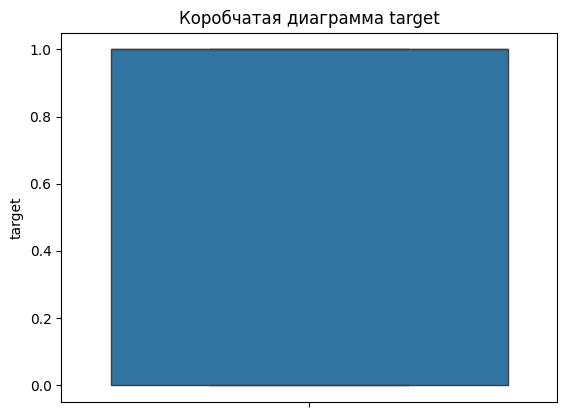

In [80]:
for feature in features:
    sns.histplot(heart[feature], bins=10)
    plt.title(f'Гистограмма {feature}')
    plt.show()
    sns.boxplot(y=heart[feature])
    plt.title(f'Коробчатая диаграмма {feature}')
    plt.show()

